In [1]:
from pathlib import Path
from book_loader import BookLoader
from typing import Dict, List
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
# spacy.prefer_gpu() # NB doesn't have access to GPU through WSL

In [2]:
data_path = Path("data/D5627-Dolan.docx").expanduser().resolve()
book = BookLoader(data_path=data_path)
chapters: list[list[str]] = book.chapters

/home/ahmedm/anaconda3/envs/LDS/lib/python3.10/site-packages/simplify_docx/iterators/generic.py:193: UnexpectedElementWarning: Skipping unexpected tag: {http://schemas.openxmlformats.org/wordprocessingml/2006/main}pict
  warn("Skipping unexpected tag: %s" % (current.tag),


In [3]:
print(f"chapters[1][:3]: {chapters[1][:3]}\n")
print(f"chapters[1][-6]: {type(chapters[1][-6])}")

chapters[1][:3]: ["Stress, santé et travail: vue d'ensemble", "J'oublie ce que j'entends, je me rappelle ce que je vois, je comprends ce que je fais.", 'CONFUCIUS']

chapters[1][-6]: <class 'list'>


In [4]:
chapters_without_tables = [
    list(filter(lambda p: isinstance(p, str), chap))
    for chap in chapters]

In [5]:
chapters_without_tables[1][-6]

'Évaluez la qualité de votre vie au travail'

In [6]:
df = pd.DataFrame(data={"chapters": range(len(chapters_without_tables))})

df["words_count"] = df["chapters"].apply(
    lambda i: sum(map(lambda p: len(p.split()) if isinstance(p, str) else 0,
                      chapters_without_tables[i])))

df["unique_words_count"] = df["chapters"].apply(
    lambda i: len(set('\n'.join(chapters_without_tables[i]).split())))

df["stop_words_count"] = df["chapters"].apply(
    lambda i: sum(map(lambda p: sum(1 for w in p.split() if w in fr_stop)
                      if isinstance(p, str) else 0,
                      chapters_without_tables[i])))

df.style.hide(axis='index')

chapters,words_count,unique_words_count,stop_words_count
0,4645,1748,2111
1,8005,2638,3437
2,11345,3495,4728
3,13340,4066,5574
4,15267,4768,6732
5,15157,4292,6683


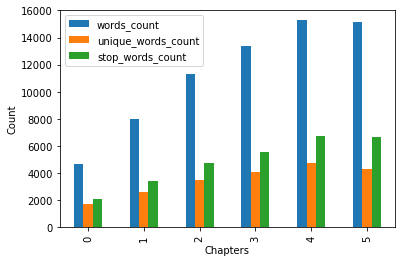

In [7]:
bar_plot = df.iloc[:, 1:].plot.bar(xlabel="Chapters", ylabel="Count")
fig = plt.gcf()

In [8]:
fig.savefig("stats.jpg")